# EDA with Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [3]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df.shape

(9, 7)

In [5]:
df.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_FT'],
      dtype='object')

In [6]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [7]:
df["ST_NUM"].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [8]:
df["ST_NUM"].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [9]:
df["ST_NUM"].isna().sum()

2

In [10]:
df["NUM_BEDROOMS"].isna().sum()

2

In [11]:
list_missing_values = ['n/a', '--', 'na']
df = pd.read_csv(
    'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv',
    na_values=list_missing_values
    )

In [12]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [13]:
df["OWN_OCCUPIED"].isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [42]:
# idx=0
# for value in df["OWN_OCCUPIED"]:
#     try:
#         int(value)
#         df.loc[idx, "OWN_OCCUPIED"]=np.nan
#     except ValueError:
#         continue
#     idx+= 1

In [14]:
# idx=0
# for value in df["OWN_OCCUPIED"]:
#     try:
#         int(value)
#         df.loc[idx, "OWN_OCCUPIED"]=np.nan
#     except ValueError:
#         pass
#     idx+= 1

In [16]:
#menghandle unknown values (null atau NaN)
idx=0
for value in df["OWN_OCCUPIED"]:
    print(value)
    try:
        int(value)
        df.loc[idx, "OWN_OCCUPIED"]=np.nan
    except ValueError:
        pass
    idx+= 1

Y
N
N
nan
Y
Y
nan
Y
Y


In [15]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [17]:
df.isna().sum()
#menjumlahkan semua missing values tiap kolom

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [20]:
df.isnull()
#atau bisa juga pakai df.isna()
#me-list semua missing values yang ada di dataframe di tiap kolom

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,True,False,True
8,False,False,False,False,True,False,False


In [22]:
df.isnull().values
#merubah isi dataframe ke dalam numpy array

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True],
       [False,  True, False, False,  True, False, False],
       [False, False, False,  True, False,  True, False],
       [ True, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False],
       [False,  True, False,  True, False, False, False],
       [False, False, False, False,  True, False,  True],
       [False, False, False, False,  True, False, False]])

In [23]:
df.isnull().values.any()
#mengambil khusus tipe data boolean jika ada salah satu --minimal satu-- antara isi array ada yang True

True

In [24]:
df.isna().sum().sum()
#menjumlahkn semua missing values dalam dataframe

12

In [25]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [26]:
idx=0
for value in df["NUM_BATH"]:
    try:
        float(value)
        df.loc[idx, "NEW_NUM_BATH"]=value
    except ValueError:
        df.loc[idx, "NEW_NUM_BATH"]=np.nan
        pass
    idx+= 1

In [46]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,NEW_NUM_BATH
0,100001000.0,104.0,PUTNAM,NaN,3.0,1,1000.0,1
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN,1.5
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0,1
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0,NaN
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0,2
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0,1
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0,NaN
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN,1
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0,2


In [27]:
df.drop(
    columns="NUM_BATH",
    inplace=True
)

In [28]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT,NEW_NUM_BATH
0,100001000.0,104.0,PUTNAM,Y,3.0,1000.0,1
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,1.5
2,100003000.0,NaN,LEXINGTON,N,NaN,850.0,1
3,100004000.0,201.0,BERKELEY,NaN,1.0,700.0,NaN
4,NaN,203.0,BERKELEY,Y,3.0,1600.0,2
5,100006000.0,207.0,BERKELEY,Y,NaN,800.0,1
6,100007000.0,NaN,WASHINGTON,NaN,2.0,950.0,NaN
7,100008000.0,213.0,TREMONT,Y,NaN,NaN,1
8,100009000.0,215.0,TREMONT,Y,NaN,1800.0,2


In [29]:
df['ST_NUM'].fillna(125)
#jika hanya begini, dataframe df nya belum terupdate

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [30]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT,NEW_NUM_BATH
0,100001000.0,104.0,PUTNAM,Y,3.0,1000.0,1
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,1.5
2,100003000.0,NaN,LEXINGTON,N,NaN,850.0,1
3,100004000.0,201.0,BERKELEY,NaN,1.0,700.0,NaN
4,NaN,203.0,BERKELEY,Y,3.0,1600.0,2
5,100006000.0,207.0,BERKELEY,Y,NaN,800.0,1
6,100007000.0,NaN,WASHINGTON,NaN,2.0,950.0,NaN
7,100008000.0,213.0,TREMONT,Y,NaN,NaN,1
8,100009000.0,215.0,TREMONT,Y,NaN,1800.0,2


In [31]:
df['ST_NUM'].fillna(125, inplace=True)
#pakai command ini untuk merubah isi dataframe nya

In [32]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT,NEW_NUM_BATH
0,100001000.0,104.0,PUTNAM,Y,3.0,1000.0,1
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,1.5
2,100003000.0,125.0,LEXINGTON,N,NaN,850.0,1
3,100004000.0,201.0,BERKELEY,NaN,1.0,700.0,NaN
4,NaN,203.0,BERKELEY,Y,3.0,1600.0,2
5,100006000.0,207.0,BERKELEY,Y,NaN,800.0,1
6,100007000.0,125.0,WASHINGTON,NaN,2.0,950.0,NaN
7,100008000.0,213.0,TREMONT,Y,NaN,NaN,1
8,100009000.0,215.0,TREMONT,Y,NaN,1800.0,2


In [34]:
mean_num_bedrooms = df.NUM_BEDROOMS.mean()
median_num_bedrooms = df.NUM_BEDROOMS.median()

In [36]:
df["NUM_BEDROOMS"].fillna(mean_num_bedrooms)

0    3.0
1    3.0
2    2.4
3    1.0
4    3.0
5    2.4
6    2.0
7    2.4
8    2.4
Name: NUM_BEDROOMS, dtype: float64

In [38]:
df["NUM_BEDROOMS"].fillna(median_num_bedrooms, inplace=True)

In [39]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT,NEW_NUM_BATH
0,100001000.0,104.0,PUTNAM,Y,3.0,1000.0,1
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,1.5
2,100003000.0,125.0,LEXINGTON,N,3.0,850.0,1
3,100004000.0,201.0,BERKELEY,NaN,1.0,700.0,NaN
4,NaN,203.0,BERKELEY,Y,3.0,1600.0,2
5,100006000.0,207.0,BERKELEY,Y,3.0,800.0,1
6,100007000.0,125.0,WASHINGTON,NaN,2.0,950.0,NaN
7,100008000.0,213.0,TREMONT,Y,3.0,NaN,1
8,100009000.0,215.0,TREMONT,Y,3.0,1800.0,2


In [40]:
obes = pd.ExcelFile("obes.xls")

In [41]:
obes.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [47]:
obes_age = obes.parse("7.2", skiprows=4, skipfooter=14)

In [48]:
obes_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

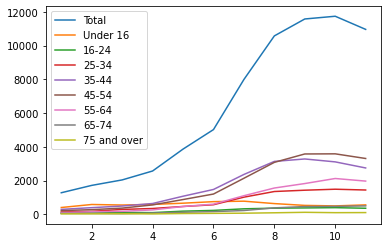

In [53]:
obes_age.plot()

In [52]:
obes_age.rename(
    columns={"Unnamed: 0":"Year"},
    inplace=True
)

In [53]:
obes_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:>

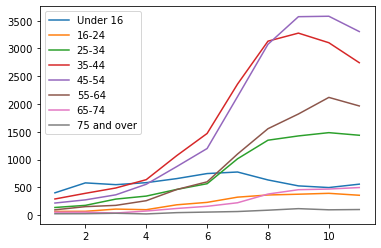

In [54]:
obes_age.drop("Total", axis=1).plot()

In [55]:
obes_age.dropna(axis=0, inplace=True)

In [56]:
obes_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [57]:
obes_age.set_index("Year", inplace=True)

In [58]:
obes_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

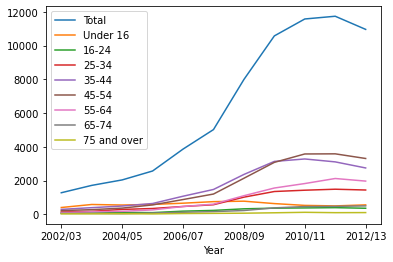

In [59]:
obes_age.plot()

<AxesSubplot:xlabel='Year'>

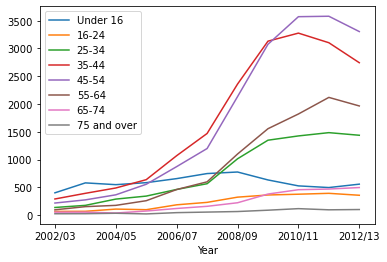

In [60]:
obes_age.drop("Total", axis=1).plot()

<AxesSubplot:xlabel='Year'>

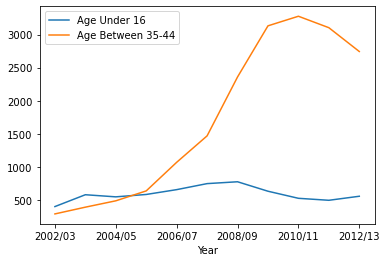

In [63]:
obes_age['Under 16'].plot(label="Age Under 16", legend=True)
obes_age['35-44'].plot(label="Age Between 35-44", legend=True)

In [64]:
from datetime import datetime

In [65]:
datetime.now()

datetime.datetime(2020, 10, 11, 1, 15, 3, 296681)

In [66]:
datetime.now().date()

datetime.date(2020, 10, 11)

In [68]:
datetime.now().hour

1

In [69]:
datetime.now().day

11

In [78]:
date_range = pd.date_range(
    start="3/1/2020",
    end="3/31/2020",
    freq="H"
)

In [79]:
date_range

DatetimeIndex(['2020-03-01 00:00:00', '2020-03-01 01:00:00',
               '2020-03-01 02:00:00', '2020-03-01 03:00:00',
               '2020-03-01 04:00:00', '2020-03-01 05:00:00',
               '2020-03-01 06:00:00', '2020-03-01 07:00:00',
               '2020-03-01 08:00:00', '2020-03-01 09:00:00',
               ...
               '2020-03-30 15:00:00', '2020-03-30 16:00:00',
               '2020-03-30 17:00:00', '2020-03-30 18:00:00',
               '2020-03-30 19:00:00', '2020-03-30 20:00:00',
               '2020-03-30 21:00:00', '2020-03-30 22:00:00',
               '2020-03-30 23:00:00', '2020-03-31 00:00:00'],
              dtype='datetime64[ns]', length=721, freq='H')

In [83]:
date_range = pd.date_range(
    start="12/01/2019",
    end="12/31/2019",
    freq="H"
)

In [84]:
date_range

DatetimeIndex(['2019-12-01 00:00:00', '2019-12-01 01:00:00',
               '2019-12-01 02:00:00', '2019-12-01 03:00:00',
               '2019-12-01 04:00:00', '2019-12-01 05:00:00',
               '2019-12-01 06:00:00', '2019-12-01 07:00:00',
               '2019-12-01 08:00:00', '2019-12-01 09:00:00',
               ...
               '2019-12-30 15:00:00', '2019-12-30 16:00:00',
               '2019-12-30 17:00:00', '2019-12-30 18:00:00',
               '2019-12-30 19:00:00', '2019-12-30 20:00:00',
               '2019-12-30 21:00:00', '2019-12-30 22:00:00',
               '2019-12-30 23:00:00', '2019-12-31 00:00:00'],
              dtype='datetime64[ns]', length=721, freq='H')

In [85]:
date_range = pd.date_range(
    start="31/01/2019",
    end="15/02/2019",
    freq="H"
)

In [86]:
date_range

DatetimeIndex(['2019-01-31 00:00:00', '2019-01-31 01:00:00',
               '2019-01-31 02:00:00', '2019-01-31 03:00:00',
               '2019-01-31 04:00:00', '2019-01-31 05:00:00',
               '2019-01-31 06:00:00', '2019-01-31 07:00:00',
               '2019-01-31 08:00:00', '2019-01-31 09:00:00',
               ...
               '2019-02-14 15:00:00', '2019-02-14 16:00:00',
               '2019-02-14 17:00:00', '2019-02-14 18:00:00',
               '2019-02-14 19:00:00', '2019-02-14 20:00:00',
               '2019-02-14 21:00:00', '2019-02-14 22:00:00',
               '2019-02-14 23:00:00', '2019-02-15 00:00:00'],
              dtype='datetime64[ns]', length=361, freq='H')

In [88]:
df=pd.DataFrame(date_range, columns=["Date"])

,Date
0,2019-01-31 00:00:00
1,2019-01-31 01:00:00
2,2019-01-31 02:00:00
3,2019-01-31 03:00:00
4,2019-01-31 04:00:00
...,...
356,2019-02-14 20:00:00
357,2019-02-14 21:00:00
358,2019-02-14 22:00:00
359,2019-02-14 23:00:00


In [89]:
df

,Date
0,2019-01-31 00:00:00
1,2019-01-31 01:00:00
2,2019-01-31 02:00:00
3,2019-01-31 03:00:00
4,2019-01-31 04:00:00
...,...
356,2019-02-14 20:00:00
357,2019-02-14 21:00:00
358,2019-02-14 22:00:00
359,2019-02-14 23:00:00


In [94]:
df["Data"]=np.random.randint(100, size=len(date_range))

In [95]:
df

,Date,Data
0,2019-01-31 00:00:00,46
1,2019-01-31 01:00:00,95
2,2019-01-31 02:00:00,9
3,2019-01-31 03:00:00,54
4,2019-01-31 04:00:00,84
...,...,...
356,2019-02-14 20:00:00,35
357,2019-02-14 21:00:00,44
358,2019-02-14 22:00:00,28
359,2019-02-14 23:00:00,65


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    361 non-null    datetime64[ns]
 1   Data    361 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 4.4 KB


In [97]:
df["Date Time"]=pd.to_datetime(df["Date"])

In [98]:
df

,Date,Data,Date Time
0,2019-01-31 00:00:00,46,2019-01-31 00:00:00
1,2019-01-31 01:00:00,95,2019-01-31 01:00:00
2,2019-01-31 02:00:00,9,2019-01-31 02:00:00
3,2019-01-31 03:00:00,54,2019-01-31 03:00:00
4,2019-01-31 04:00:00,84,2019-01-31 04:00:00
...,...,...,...
356,2019-02-14 20:00:00,35,2019-02-14 20:00:00
357,2019-02-14 21:00:00,44,2019-02-14 21:00:00
358,2019-02-14 22:00:00,28,2019-02-14 22:00:00
359,2019-02-14 23:00:00,65,2019-02-14 23:00:00


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       361 non-null    datetime64[ns]
 1   Data       361 non-null    int32         
 2   Date Time  361 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int32(1)
memory usage: 7.2 KB


In [100]:
df.set_index("Date Time", inplace=True)

In [101]:
df

,Date,Data
Date Time,,
2019-01-31 00:00:00,2019-01-31 00:00:00,46
2019-01-31 01:00:00,2019-01-31 01:00:00,95
2019-01-31 02:00:00,2019-01-31 02:00:00,9
2019-01-31 03:00:00,2019-01-31 03:00:00,54
2019-01-31 04:00:00,2019-01-31 04:00:00,84
...,...,...
2019-02-14 20:00:00,2019-02-14 20:00:00,35
2019-02-14 21:00:00,2019-02-14 21:00:00,44
2019-02-14 22:00:00,2019-02-14 22:00:00,28


In [102]:
opsd_daily = pd.read_csv ('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')

In [103]:
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [105]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [106]:
opsd_daily = pd.read_csv (
    'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',
    parse_dates=True, index_col=0)

In [107]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [109]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [112]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [113]:
opsd_daily.index.date

array([datetime.date(2006, 1, 1), datetime.date(2006, 1, 2),
       datetime.date(2006, 1, 3), ..., datetime.date(2017, 12, 29),
       datetime.date(2017, 12, 30), datetime.date(2017, 12, 31)],
      dtype=object)

In [114]:
opsd_daily.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [115]:
opsd_daily.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=4383)

In [116]:
opsd_daily.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=4383)

In [117]:
opsd_daily.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='Date', length=4383)

In [121]:
opsd_daily["Year"]=opsd_daily.index.year
opsd_daily["Month"]=opsd_daily.index.month
opsd_daily["Day Name"]=opsd_daily.index.day_name()
opsd_daily["Weekday"]=opsd_daily.index.weekday

In [122]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day Name,Weekday
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday,3
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,4


In [123]:
opsd_daily.loc["2017-08-10"]

Consumption     1351.49
Wind            100.274
Solar             71.16
Wind+Solar      171.434
Year               2017
Month                 8
Day Name       Thursday
Weekday               3
Name: 2017-08-10 00:00:00, dtype: object

In [125]:
opsd_daily.loc["2014-01-20":"2014-01-22"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day Name,Weekday
Date,,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday,2


In [126]:
opsd_daily.loc["2017-12-01":]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day Name,Weekday
Date,,,,,,,,
2017-12-01,1592.96187,52.323,19.266,71.589,2017,12,Friday,4
2017-12-02,1391.85405,126.274,16.459,142.733,2017,12,Saturday,5
2017-12-03,1330.26226,387.490,12.411,399.901,2017,12,Sunday,6
2017-12-04,1620.97758,479.798,10.747,490.545,2017,12,Monday,0
2017-12-05,1643.72307,611.488,10.953,622.441,2017,12,Tuesday,1
2017-12-06,1639.08265,632.501,7.618,640.119,2017,12,Wednesday,2
2017-12-07,1628.47979,743.725,42.994,786.719,2017,12,Thursday,3
2017-12-08,1618.05658,652.830,20.504,673.334,2017,12,Friday,4
2017-12-09,1415.34531,712.317,12.344,724.661,2017,12,Saturday,5


In [127]:
opsd_daily.loc["2017-12"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day Name,Weekday
Date,,,,,,,,
2017-12-01,1592.96187,52.323,19.266,71.589,2017,12,Friday,4
2017-12-02,1391.85405,126.274,16.459,142.733,2017,12,Saturday,5
2017-12-03,1330.26226,387.490,12.411,399.901,2017,12,Sunday,6
2017-12-04,1620.97758,479.798,10.747,490.545,2017,12,Monday,0
2017-12-05,1643.72307,611.488,10.953,622.441,2017,12,Tuesday,1
2017-12-06,1639.08265,632.501,7.618,640.119,2017,12,Wednesday,2
2017-12-07,1628.47979,743.725,42.994,786.719,2017,12,Thursday,3
2017-12-08,1618.05658,652.830,20.504,673.334,2017,12,Friday,4
2017-12-09,1415.34531,712.317,12.344,724.661,2017,12,Saturday,5


In [128]:
opsd_daily.loc["2017-11"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day Name,Weekday
Date,,,,,,,,
2017-11-01,1309.18478,420.446,37.046,457.492,2017,11,Wednesday,2
2017-11-02,1474.19484,336.745,51.504,388.249,2017,11,Thursday,3
2017-11-03,1471.18241,115.927,50.761,166.688,2017,11,Friday,4
2017-11-04,1284.77485,309.381,57.358,366.739,2017,11,Saturday,5
2017-11-05,1193.85495,259.371,25.261,284.632,2017,11,Sunday,6
2017-11-06,1505.67173,98.420,40.298,138.718,2017,11,Monday,0
2017-11-07,1545.63945,148.785,27.302,176.087,2017,11,Tuesday,1
2017-11-08,1547.48171,62.667,18.332,80.999,2017,11,Wednesday,2
2017-11-09,1557.63091,210.488,15.289,225.777,2017,11,Thursday,3


<AxesSubplot:xlabel='Date'>

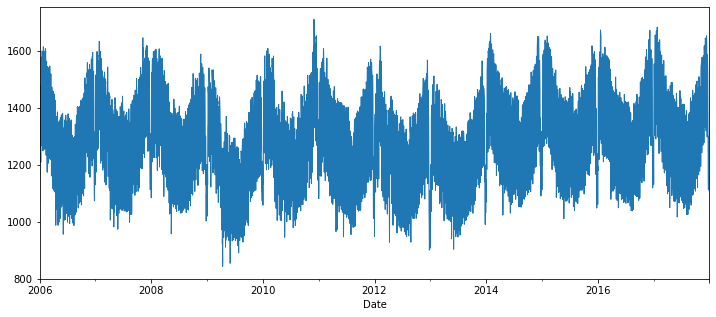

In [139]:
opsd_daily["Consumption"].plot(linewidth=1, figsize=(12, 5))

<AxesSubplot:xlabel='Date'>

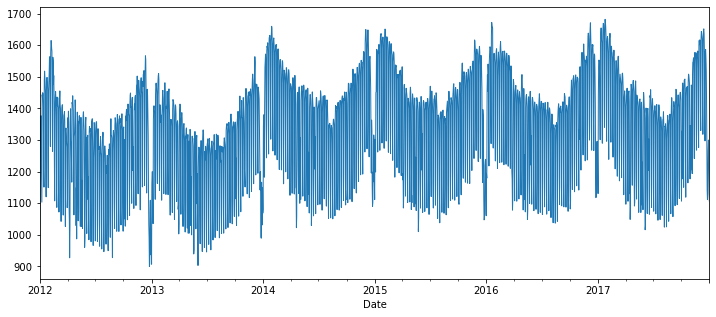

In [140]:
opsd_daily.loc["2012":"2017", "Consumption"].plot(linewidth=1, figsize=(12, 5))